In [1]:
########
##HMC##
########
'''
this program will help to find the convergence rate of HMC, in term of magnetic moment
author: Hao SUN
email: sunhopht@gmail.com
'''

import numpy as np
import matplotlib.pyplot as plt
import datetime
import random
random.seed(123)#for duplication



now = datetime.datetime.now()
#the start time

I =15
J =15
#I,J  are the shape of the simulated optical lattice

A = np.empty((I,J))
B = np.empty((I,J))
for i in range(I):
    for j in range(J):
        A[i,j]= 1
        B[i,j]= 1        
        
JKBTMAX = 5 #range of temperature 
Steplen = 0.1 # step length


T = int(JKBTMAX/Steplen) #the number of temperature 
M = np.empty((10,T))#the average magnetic moment for every 10 percent result of each T
for i in range(10):
    for t in range(T):
        M[i,t] = 0

CYCLE =4000
W = CYCLE
for jkbt in range(T):
    Temp = jkbt
    for w in range(W):
        for i in range(I):
            for j in range(J):
                if i==0:
                    im=I-1
                else:
                    im=i-1
                if i==I-1:
                    ip=0
                else:
                    ip=i+1
                if j==0:
                    jm=J-1
                else:
                    jm=j-1
                if j==J-1:
                    jp=0
                else:
                    jp=j+1
                Sumup = 0
                Sumup = A[ip,j]+A[i,jp]+A[im,j]+A[i,jm]
                Timesup = 0
                Timesup = Sumup * A[i,j]
                B[i,j] = - np.sign(Temp*Steplen* np.log(1/random.uniform(0,1)) - 2*Timesup ) *A[i,j]
                A[:,:] = B[:,:]
        M[np.floor((w)*10/W),jkbt]+= np.sum(A)
    M[:,jkbt] /= (W/10)
end = datetime.datetime.now()
print("time:",(end-now).total_seconds())
        
        

ii = range(T)
ii = np.asarray(ii)
T_ =(ii[:]*Steplen)
Onsager= I*J*(1-np.sinh(2/T_)**(-4))**0.125
for i in range(len(Onsager)):
    if np.isnan(Onsager[i]):
        Onsager[i]=0

#this is the Onsager solution

/Users/sunhop/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:71: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


time: 311.243402


/Users/sunhop/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:81: RuntimeWarning: divide by zero encountered in true_divide
/Users/sunhop/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:81: RuntimeWarning: invalid value encountered in power


Error: 75.1296369184


/Users/sunhop/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in true_divide
/Users/sunhop/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in power


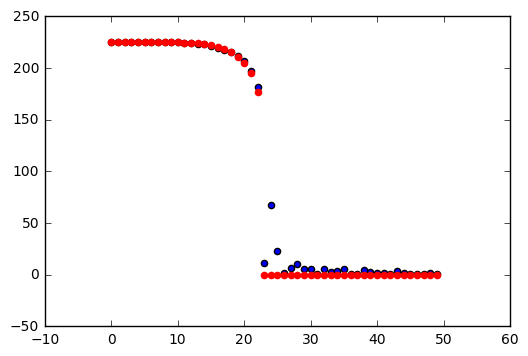

Error: 147.905670633


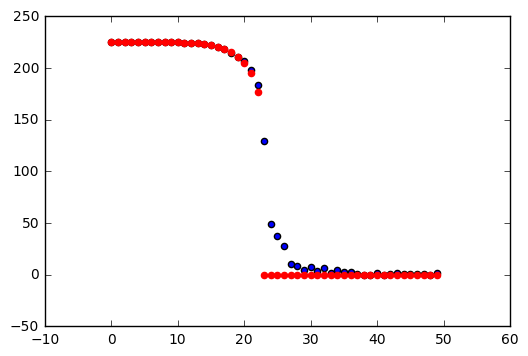

Error: 213.581921364


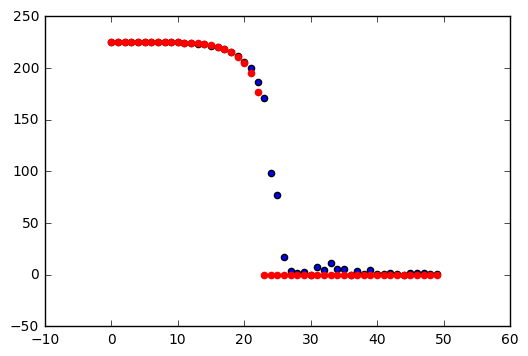

Error: 51.6390971335


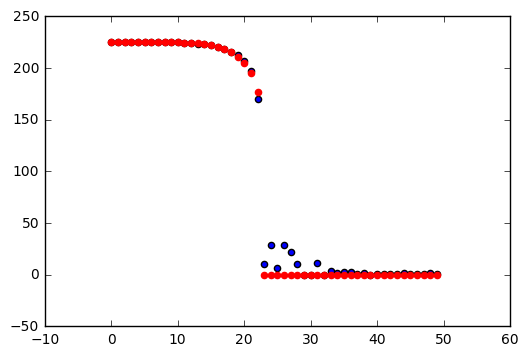

Error: 186.280575073


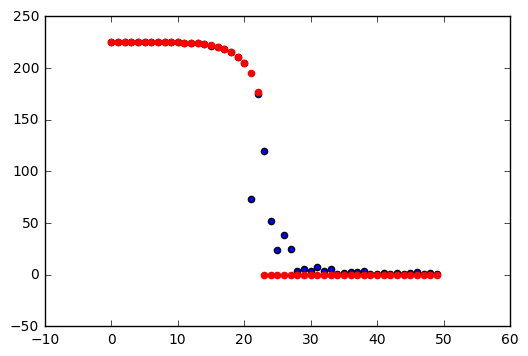

Error: 151.809011142


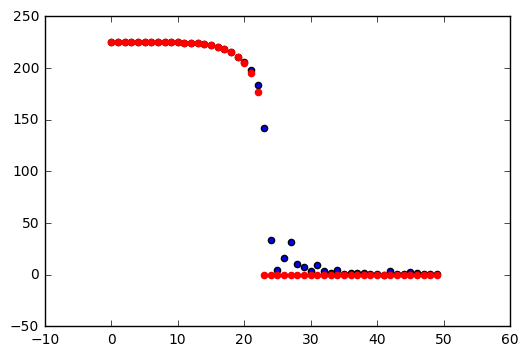

Error: 133.710225639


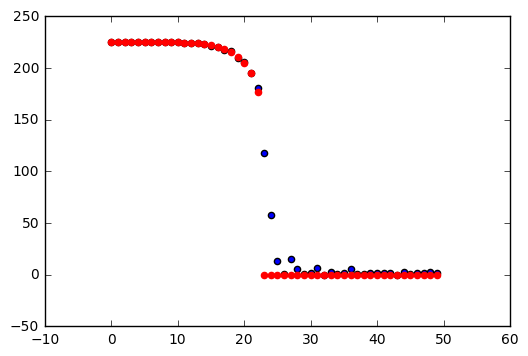

Error: 135.024269055


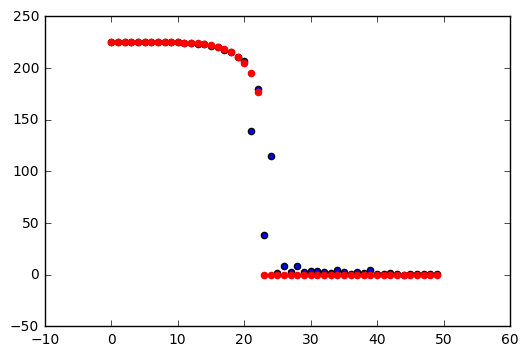

Error: 181.450933696


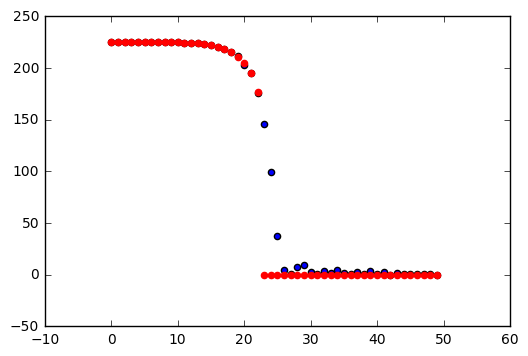

Error: 54.2801312137


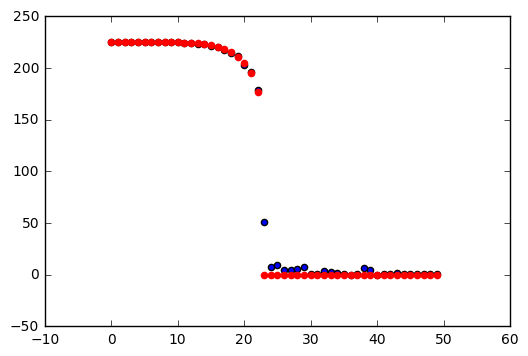

Err_mean : 133.081147187


In [2]:
ii = range(T)
ii = np.asarray(ii)
T_ =(ii[:]*Steplen)
Onsager= I*J*(1-np.sinh(2/T_)**(-4))**0.125
for i in range(len(Onsager)):
    if np.isnan(Onsager[i]):
        Onsager[i]=0
Err_sum = 0
for i in range(10):
    print("Error:",np.sqrt(np.sum((np.abs(M[i,:]) - np.abs(Onsager))**2)))
    Err_sum += np.sqrt(np.sum((np.abs(M[i,:]) - np.abs(Onsager))**2))
    plt.scatter(ii,np.abs(M[i,:]))
    plt.scatter(ii,Onsager,color='red')
    plt.show()
    

print("Err_mean :",Err_sum/10)